In [35]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные Titanic
data = pd.read_csv('Titanic-Dataset.csv')

# Посмотрим на первые строки данных
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
data['Embarked'].nunique()
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Вывод: так как уникальных значений в Embarked всего 3, то заполним пропуски наиболее частым значением - S.

Выполним заполнение null значений в соответсвтвии с выводами выше.

In [38]:
data['Age'] = data['Age'].fillna(data['Age'].median())

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


# Гипотеза 1: Различия в выживаемости между полами

Гипотеза: Женщины выживали чаще, чем мужчины.

Тест: Тест на независимость (хи-квадрат).

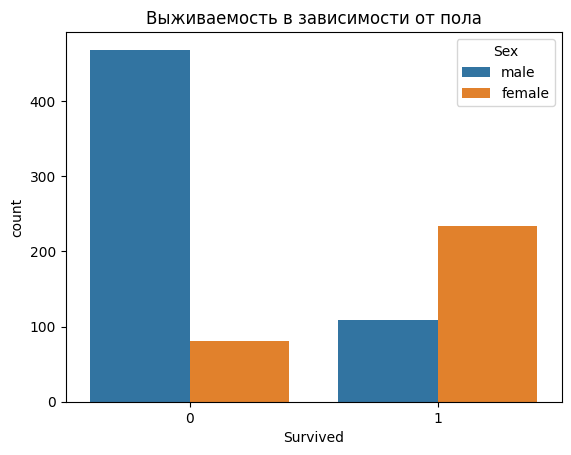

Chi2: 260.71702016732104, p-value: 1.1973570627755645e-58


In [39]:
# Визуализация выживаемости по полу
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Выживаемость в зависимости от пола')
plt.show()

# Кросс-таблица выживаемости и пола
cross_tab_sex = pd.crosstab(data['Survived'], data['Sex'])

# Тест на независимость (хи-квадрат)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab_sex)
print(f"Chi2: {chi2}, p-value: {p}")


### Вывод: (p-value < 0.05) Есть значимая зависимость между полом пассажира и его выживаемостью. Женщины действительно выживали чаще, чем мужчины.

# Гипотеза 2: Влияние возраста на вероятность выживания

Гипотеза: Возраст пассажиров влияет на вероятность выживания.

Тест: тест Манна–Уитни.

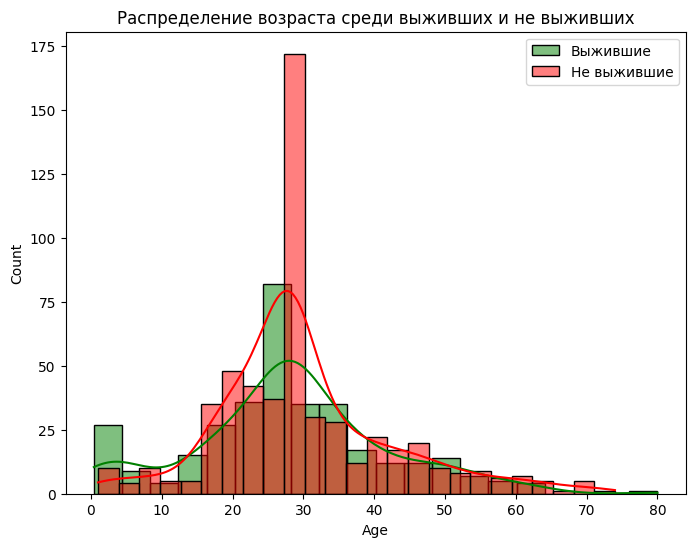

Mann-Whitney: 89779.5, p-value: 0.2696731214886362


In [47]:
# Визуализация распределения возраста
plt.figure(figsize=(8,6))

ages_survived = data[data['Survived'] == 1]['Age'].dropna()
ages_not_survived = data[data['Survived'] == 0]['Age'].dropna()

sns.histplot(ages_survived, kde=True, color='green', label='Выжившие')
sns.histplot(ages_not_survived, kde=True, color='red', label='Не выжившие')
plt.title('Распределение возраста среди выживших и не выживших')
plt.legend()
plt.show()

# Проверка корреляции между возрастом и выживаемостью
mannwhitney_result = stats.mannwhitneyu(ages_survived, ages_not_survived)
print(f"Mann-Whitney: {mannwhitney_result.statistic}, p-value: {mannwhitney_result.pvalue}")

### Выводы: Нет значимой корреляции между возрастом и выживаемостью пассажиров (поскольку p-значение больше 0.05). Это означает, что возраст пассажира не является статистически значимым фактором выживания в данной выборке.

# Гипотеза 3: Различия в выживаемости детей и взрослых 

Гипотеза: Дети (младше 18 лет) имели более высокие шансы на выживание.

Тест: Хи-квадрат.


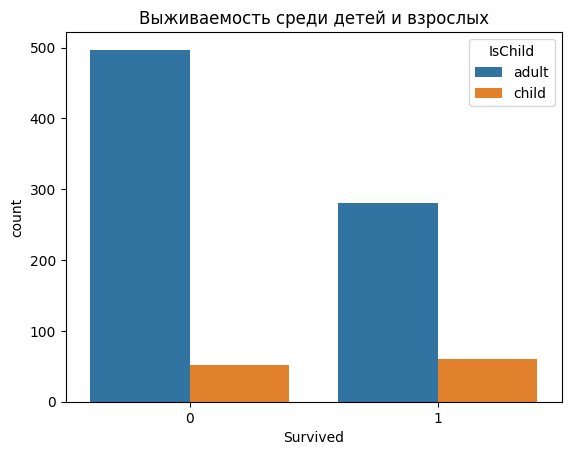

Chi2: 12.56903165970517, p-value: 0.00039219174140767127


In [41]:
# Создадим новую переменную для определения детей (возраст < 18)
data['IsChild'] = data['Age'].apply(lambda x: 'child' if x < 18 else 'adult')

# Визуализация выживаемости среди детей и взрослых
sns.countplot(x='Survived', hue='IsChild', data=data)
plt.title('Выживаемость среди детей и взрослых')
plt.show()

# Тест на независимость (хи-квадрат) для детей и взрослых
cross_tab_child = pd.crosstab(data['Survived'], data['IsChild'])
chi2, p, dof, expected = chi2_contingency(cross_tab_child)
print(f"Chi2: {chi2}, p-value: {p}")


### Выводы: (p-value < 0.05)  Есть значимая зависимость между возрастом (дети/взрослые) и выживаемостью. Дети имели большие шансы на выживание, чем взрослые.

# Гипотеза 4: Различия выживаемости среди пассажиров с разной стоимостью билета

Гипотеза: Пассажиры с более дорогими билетами выживали чаще.

Тест: тест Манна–Уитни.


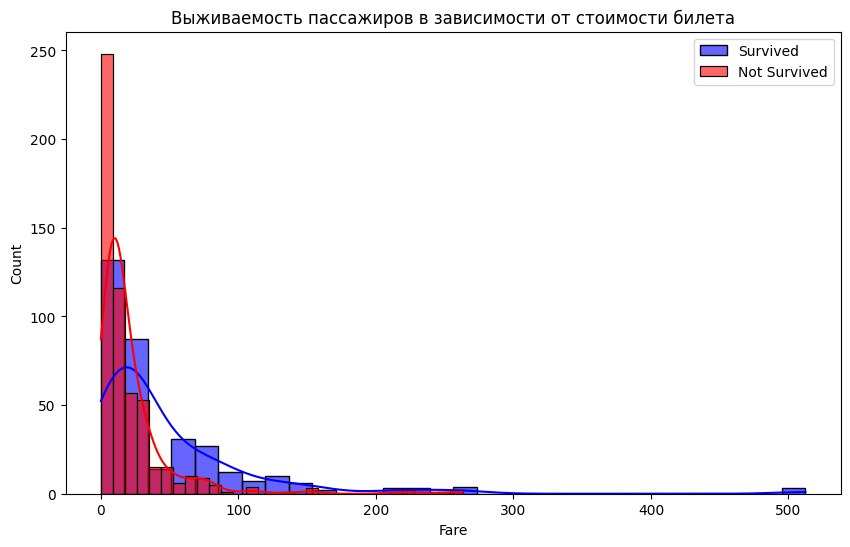

Mann-Whitney: 129951.5, p-value: 4.553477179250237e-22


In [42]:
# Разделим данные на группы: выжившие и не выжившие
fare_survived = data[data['Survived'] == 1]['Fare'].dropna()
fare_not_survived = data[data['Survived'] == 0]['Fare'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(fare_survived, bins=30, kde=True, color='blue', label='Survived', alpha=0.6)
sns.histplot(fare_not_survived, bins=30, kde=True, color='red', label='Not Survived', alpha=0.6)
plt.title('Выживаемость пассажиров в зависимости от стоимости билета')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

# Проверка различий стоимости билета между группами
mannwhitney_result = mannwhitneyu(fare_survived, fare_not_survived, alternative='two-sided')
print(f"Mann-Whitney: {mannwhitney_result.statistic}, p-value: {mannwhitney_result.pvalue}")


### Выводы: (p-value < 0.05) Есть значимая разница в стоимости билета между выжившими и невыжившими. Пассажиры, которые заплатили больше за билет, имели больше шансов выжить.

# Гипотеза 5: Зависимость выживаемости от семейного статуса

Гипотеза: Пассажиры с родственниками имели большую вероятность выжить.

Тест: Хи-квадрат.


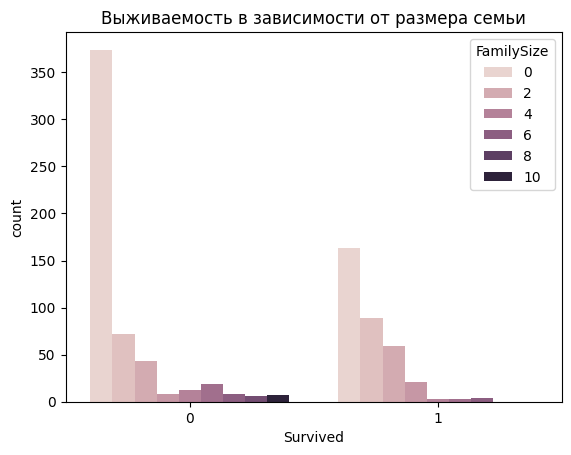

Chi2: 80.67231343783078, p-value: 3.579668975443533e-14


In [43]:
# Создадим переменную для размера семьи (SibSp + Parch)
data['FamilySize'] = data['SibSp'] + data['Parch']

# Визуализация выживаемости в зависимости от размера семьи
sns.countplot(x='Survived', hue='FamilySize', data=data)
plt.title('Выживаемость в зависимости от размера семьи')
plt.show()

# Тест на независимость (хи-квадрат)
cross_tab_family = pd.crosstab(data['Survived'], data['FamilySize'])
chi2, p, dof, expected = chi2_contingency(cross_tab_family)
print(f"Chi2: {chi2}, p-value: {p}")


### Выводы: (p-value < 0.05) Есть значимая зависимость между размером семьи и выживаемостью. Пассажиры, путешествовавшие с родственниками, имели большие шансы выжить.

# Гипотеза 6: Средний возраст выживших пассажиров отличается от среднего возраста не выживших пассажиров.

Гипотеза: средний возраст выживших пассажиров отличается от среднего возраста не выживших пассажиров.

Тест: t-тест

In [44]:
# 1. Разделим данные на выживших и не выживших, отбросив пропуски в возрасте
survived_age = data[data['Survived'] == 1]['Age'].dropna()
not_survived_age = data[data['Survived'] == 0]['Age'].dropna()

# 2. Рассчитаем средний возраст для каждой группы
mean_survived_age = survived_age.mean()
mean_not_survived_age = not_survived_age.mean()

print(f"Средний возраст выживших: {mean_survived_age}")
print(f"Средний возраст не выживших: {mean_not_survived_age}")

# 3. Проверим значимость различий с помощью t-теста (если данные нормальны)
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(survived_age, not_survived_age)
print(f"t-статистика: {t_stat}, p-value: {p_value}")


Средний возраст выживших: 28.29143274853801
Средний возраст не выживших: 30.028233151183972
t-статистика: -1.9394659179476366, p-value: 0.0527606884758555


### Выводы: Есть значимые различия в возрасте между выжившими и не выжившими. Пассажиры, которые выжили, были в среднем моложе, чем те, кто не выжил.

# Гипотеза 7: Пассажиры первого класса были старше пассажиров третьего класса

Тест: U-критерий Манна-Уитни

In [45]:
from scipy.stats import mannwhitneyu

# 1. Разделим данные на пассажиров первого и третьего классов
first_class_age = data[data['Pclass'] == 1]['Age'].dropna()
third_class_age = data[data['Pclass'] == 3]['Age'].dropna()

# 2. Рассчитаем медианный возраст для каждой группы
median_first_class_age = first_class_age.median()
median_third_class_age = third_class_age.median()

print(f"Медианный возраст пассажиров первого класса: {median_first_class_age}")
print(f"Медианный возраст пассажиров третьего класса: {median_third_class_age}")

# 3. Проведем тест Манна-Уитни для сравнения возрастов между классами
stat, p_value = mannwhitneyu(first_class_age, third_class_age)

print(f"U-статистика: {stat}, p-value: {p_value}")


Медианный возраст пассажиров первого класса: 35.0
Медианный возраст пассажиров третьего класса: 28.0
U-статистика: 76768.0, p-value: 1.0328820713228344e-21


### Выводы: Есть значимые различия в возрасте между пассажирами первого и третьего классов (p-value < 0.05) Медианный возраст пассажиров 1-класса значительно больше медианного возраста пассажиров 3-класса. Учитывая социальные и экономические факторы того времени, пассажиры старшего возраста часто могли позволить себе более дорогие билеты в первый класс.